In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"


 0e77b1ab-5df7-425b-bec2-ac2b9045f266.jpg
 100D5200
'CEI contacts.gsheet'
'Colab Notebooks'
'Copy of DSC_0359.JPG'
 Dance
 DSC_1064.JPG
 DSC_1117.JPG
'Exercise 6.docx'
'How to get started with Drive.pdf'
 IMG_0292.JPG
 IMG_0302.JPG
 IMG_6919.mov
 IMG_7567.MOV
 IMG_7571.MOV
 IMG_7607.MOV
 _MG_8689.JPG
'Queue ADT '
 RPReplay_Final1577254438.mp4
 spectogrampix
 spectrogrampaper
'Untitled document.gdoc'
'Untitled spreadsheet.gsheet'
 video-output-62E49C2B-F4CD-4095-AEF2-EA5D2FE2CD53.MOV


In [ ]:
!ls "/content/drive/My Drive/spectrogrampaper"

'Segmented negative'  'Segmented positive'


In [ ]:
path_dir = './drive/My Drive/spectrogrampaper'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.2)
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150,150),
    shuffle=True,
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150,150),
    subset='validation'
)

Found 98 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax') 
]) 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train_generator, batch_size=15,epochs=130)

Epoch 1/130
4/4 [==============================] - 3s 468ms/step - loss: 5.4159e-04 - accuracy: 1.0000
Epoch 2/130
4/4 [==============================] - 2s 466ms/step - loss: 0.0161 - accuracy: 0.9898
Epoch 3/130
4/4 [==============================] - 2s 723ms/step - loss: 0.0404 - accuracy: 0.9796
Epoch 4/130
4/4 [==============================] - 2s 475ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 5/130
4/4 [==============================] - 2s 474ms/step - loss: 3.2794e-04 - accuracy: 1.0000
Epoch 6/130
4/4 [==============================] - 2s 710ms/step - loss: 0.0173 - accuracy: 0.9898
Epoch 7/130
4/4 [==============================] - 2s 726ms/step - loss: 1.8789e-04 - accuracy: 1.0000
Epoch 8/130
4/4 [==============================] - 2s 734ms/step - loss: 0.0329 - accuracy: 0.9898
Epoch 9/130
4/4 [==============================] - 2s 517ms/step - loss: 2.4178e-04 - accuracy: 1.0000
Epoch 10/130
4/4 [==============================] - 2s 729ms/step - loss: 6.5654e-04 - accura

1/1 [==============================] - 0s 499ms/step - loss: 2.1689 - accuracy: 0.8261
n Test_Accuracy:- 0.8260869383811951
confusion matrix
[[14  0]
 [ 0  9]]


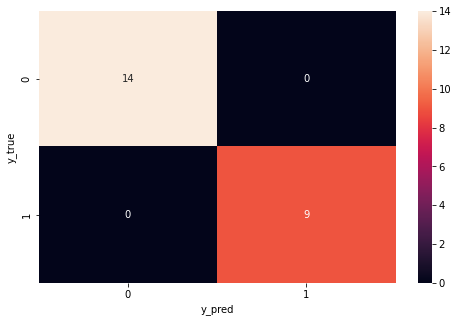

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
accuracy = model.evaluate(validation_generator)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

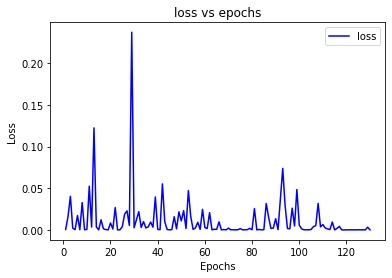

In [ ]:
loss =history.history['loss']
epochs = range(1,131)
plt.plot(epochs, loss, 'b', label='loss')
plt.title('loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

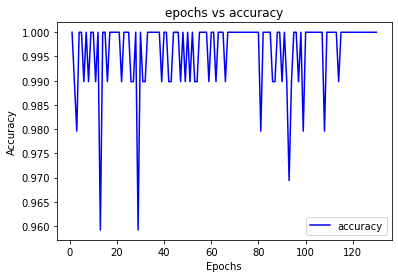

In [ ]:
acc= history.history['accuracy']
epochs = range(1,131)
plt.plot(epochs,acc, 'b', label='accuracy')
plt.title('epochs vs accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()